<figure>
<IMG SRC="../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 6

### Error bounds on coherence estimates

<div style='background:#F0F0F0'>  The 95% confidence intervals for the coherence squared $\gamma^2_{xy}(f)$ between two variables $x(t)$ and $y(t)$ are approximately:
$$ \gamma^2_{xy} \pm \frac{\sqrt{2}\left(1+\gamma^2_{xy}\right)}{\left|\gamma_{xy} \right|\sqrt{n_d}}$$
where $n_d$ is the number of blocks used to calculate the coherence.  

You **may** use `matplotlib.mlab.csd` for the following question, but you had best use it correctly!
</div>

<div style='background:#F0F0F0'>**1** Make an input process $x(t)$ as random Gaussian noise, and the output process the sum of a noise source and a running average of the input: $y(t)=n(t)+\frac{1}{b}\int_{t-b}^t x(t')dt'$ and plot (Zoom so we can see whats going on, and label your plot).  Make sure you generate a large time series.</div> 

In [18]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math as math
%matplotlib nbagg

<IPython.core.display.Javascript object>


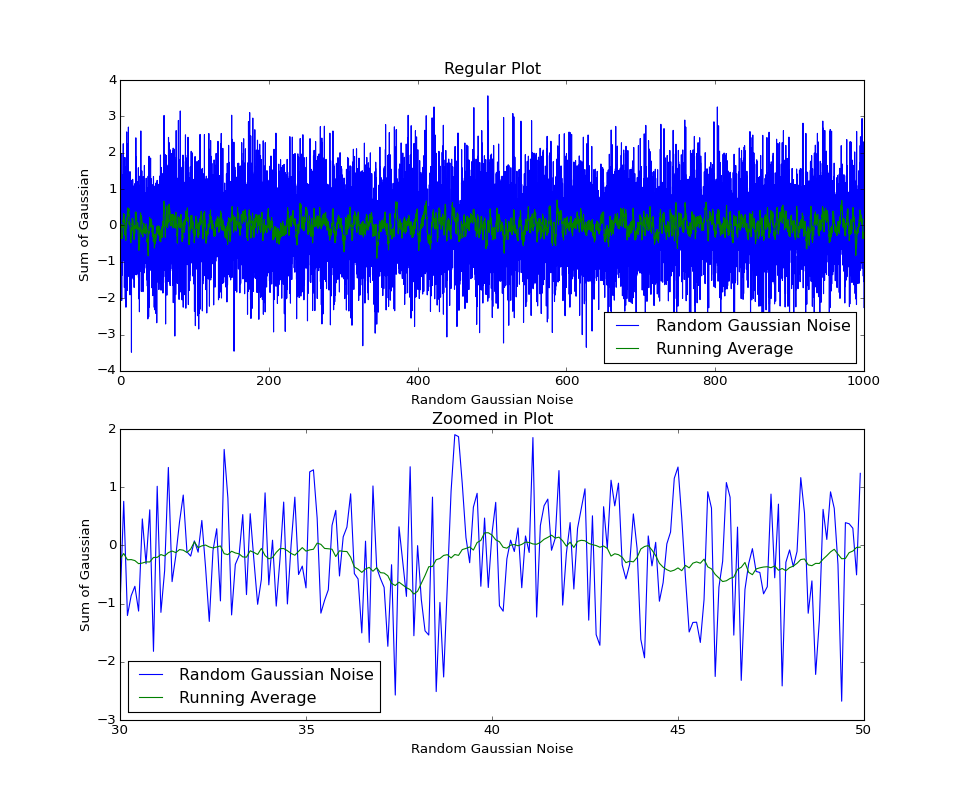

In [19]:
N = 10000
x = random.normal(0.,1.,N)
b = 20.
t = np.arange(0.,1000.,1000./N)
n = np.random.normal(0,0.01,x.size)
dt = t[1]-t[0]
y = n + np.convolve(x, np.ones(int(b))/b, mode='same')


fig,ax=plt.subplots(2,1,figsize=(12,10))
ax[0].plot(t,x, label='Random Gaussian Noise')
ax[0].plot(t,y, label ='Running Average')
ax[0].set_xlabel('Random Gaussian Noise')
ax[0].set_ylabel('Sum of Gaussian')
ax[0].set_title('Regular Plot')
ax[0].legend(loc='best')

ax[1].plot(t[300:500],x[300:500], label='Random Gaussian Noise')
ax[1].plot(t[300:500],y[300:500], label ='Running Average')
ax[1].set_xlabel('Random Gaussian Noise')
ax[1].set_ylabel('Sum of Gaussian')
ax[1].set_title('Zoomed in Plot')
ax[1].legend(loc='best')

<div style='background:#F0F0F0'>**2** Compute the coherence squared of the input and the output.  Make a plot with the spectra in the upper panel and the coherence squared in the middle panel and the phase in the bottom.

You will need to choose a value for your fft length.  Choose a relative low one to get a smooth plot.
</div>

<IPython.core.display.Javascript object>


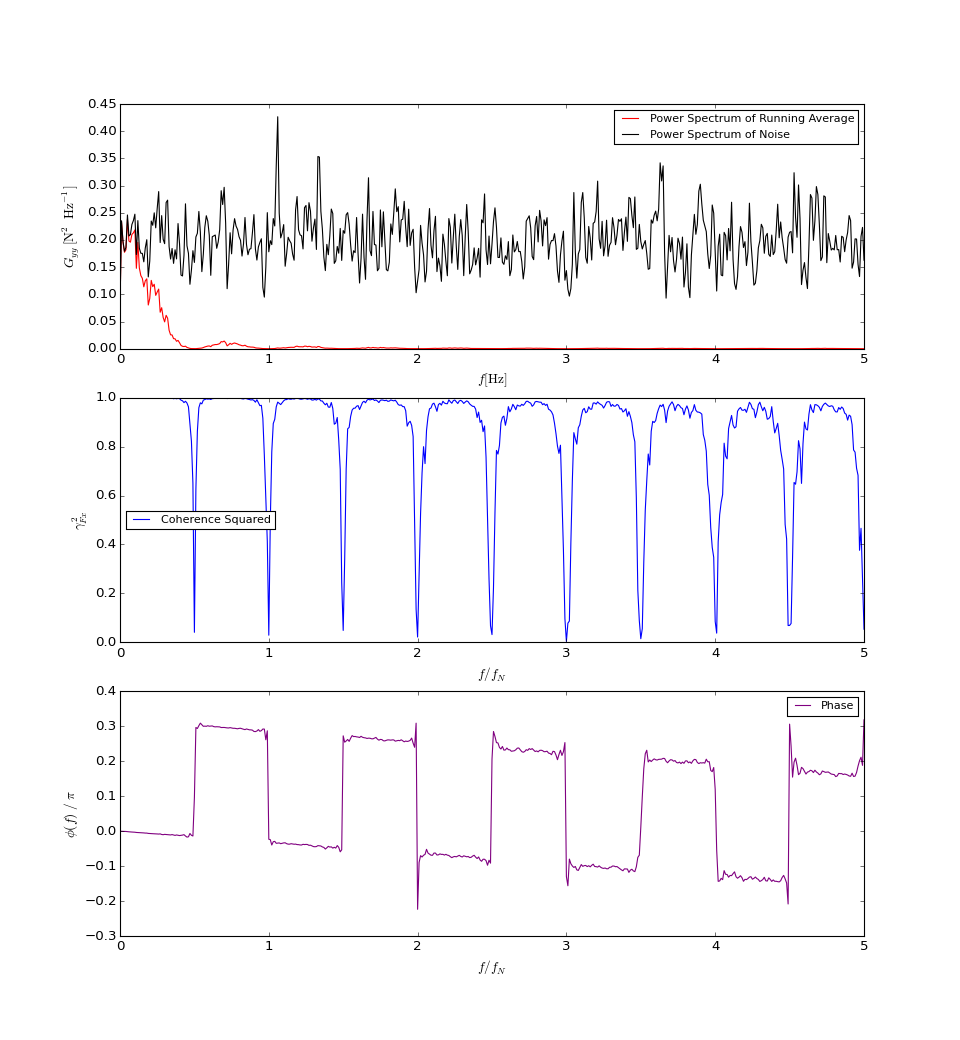

In [20]:
length = 1000
cxy,fxy=mlab.csd(x,y,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
py,fy=mlab.psd(y,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
px,fx=mlab.psd(x,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2);
ang = np.arctan2(np.imag(cxy),np.real(cxy))/np.pi

fig,ax=plt.subplots(3,1,figsize=(12,13))
ax[0].plot(fy,py,'k',color='red', label='Power Spectrum of Running Average')
ax[0].plot(fx,px,'k',color='black', label='Power Spectrum of Noise')
ax[0].set_xlabel(r'$f \mathrm{[Hz]}$')
ax[0].set_ylabel(r'$G_{yy}\ \mathrm{[N^2\ Hz^{-1}]}$');
ax[0].legend(loc='best',fontsize='small')
#ax[0].set_ylim([0,1.1])

ax[1].plot(fxy,abs(cxy)**2/px/py,'k',color='blue', label='Coherence Squared')
ax[1].set_ylabel('$\gamma^2_{Fx}$')
ax[1].set_xlabel('$f/f_N$')
ax[1].legend(loc='best',fontsize='small')

ax[2].plot(fxy,ang/np.pi,'k',color='purple',label='Phase')
ax[2].set_xlabel('$f/f_N$')
ax[2].set_ylabel('$\phi(f)\ /\ \pi$');
ax[2].legend(loc='best',fontsize='small')

The power spectra of the two plots are quite different in that the random noise is higher, while the running average quiets down quite quickly. The coherence plot shows that at approsimately every 0.5 $\frac{f}{f_N}$, there is a sudden drop in coherence, by looking at the phase plot we can see that a $\pi$ phase shift occurs at these times when the coherence drops to zero.

<div style='background:#F0F0F0'>**3** Now repeat the above for three different values of NFFT, each 5 times as large as the next.  Plot the resulting coherence squared functions in separate panels.  Add the confidence intervals to your plot and comment on which peaks are significant.
</div>

<IPython.core.display.Javascript object>


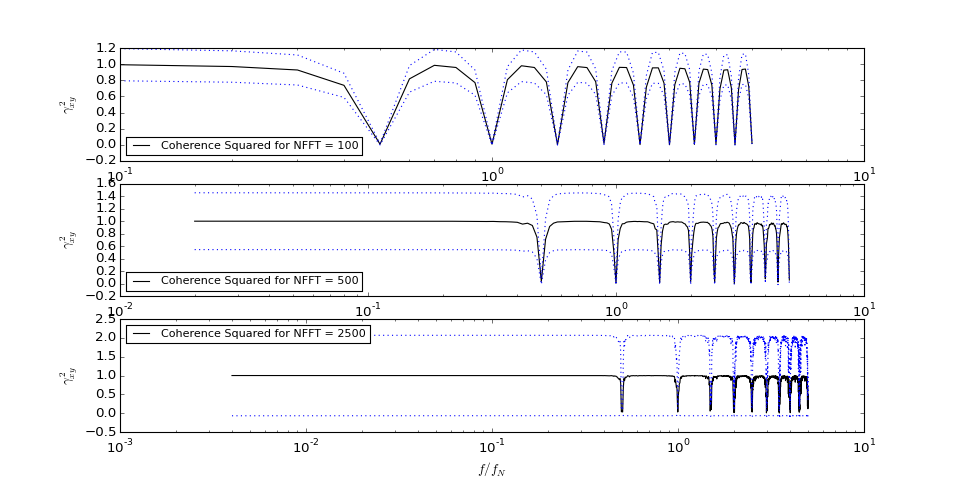

In [21]:
def graphs(x,y,p,locate):
    nn = (len(x) / float(p))*2 - 1
    cxy,fxy=mlab.csd(x,y,NFFT=p,Fs=1./dt,window=mlab.window_hanning,noverlap=p/2)
    py,fy=mlab.psd(y,NFFT=p,Fs=1./dt,window=mlab.window_hanning,noverlap=p/2)
    px,fx=mlab.psd(x,NFFT=p,Fs=1./dt,window=mlab.window_hanning,noverlap=p/2);
    co = abs(cxy)**2/px/py
    sqrtco = np.sqrt(co)
    inter = np.sqrt(2.)*(1+co) / math.sqrt(nn)*sqrtco
    ax[locate].semilogx(fxy,co,'k', label='Coherence Squared for NFFT = %i' %p)
    ax[locate].semilogx(fxy,co+inter,':b')
    ax[locate].semilogx(fxy,co-inter,':b')
    ax[locate].set_ylabel('$\gamma^2_{xy}$')
    ax[locate].set_xlabel('$f/f_N$')
    ax[locate].legend(loc='best',fontsize='small')
    #ax[locate].set_ylim([-2,3])


fig,ax=plt.subplots(3,1,figsize=(12,6))
graphs(x,y,100,0)
graphs(x,y,500,1)
graphs(x,y,2500,2)

As the number of blocks increase, the coherence appears more defined and more spread out. The error on the coherence also increases as more blocks are used. Although it does appear to flatten out to a value of 1, as should be expecetd, but there are the drops at every 0.5 $\frac{f}{f_N}$ which prevent it from achieving such a result.

## Q2: Shear turbulence data

In [22]:
time = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')

Download the data abaove. time is a measurement time in seconds. shear is a little less than 300 s of data from a turbulence shear probe. Units are s−1. ac is a suitably scaled acceleration of the vehicle containing the shear probes.
1 Plot the shear time series and the accelerometer time series. Comment on any similarities and differences. Comment on the stationarity of the time series

<IPython.core.display.Javascript object>


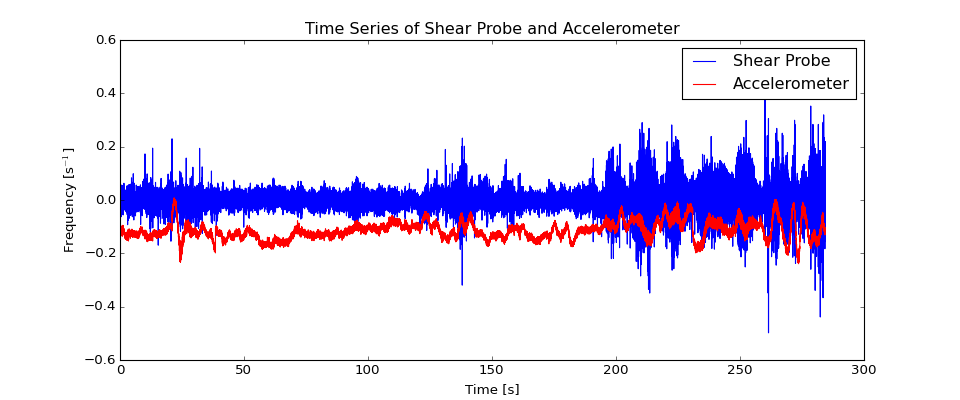

12500.0
80.0


In [23]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(time,shear, label='Shear Probe')
ax.plot(time,ac, label='Accelerometer',color='red')
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'Frequency [s$^{-1}$]')
ax.set_title('Time Series of Shear Probe and Accelerometer')
ax.legend()
print 80./(time[1]-time[0])
print time[12499]

They share similarities such as when there is a large freuquency in one, the other also has a change there as well. Examples inculde times around 20s, and 140s. When the higher frequencies are examined they both seem to vary alot. The acceleraometer appears to have a lower frequency suggesting that this is infact the noise that must be taken into account later.

2 Compute the power spectra of the two signals and the coherence squared (you could do the phase too, but it is not too thrilling). Comment on the spectral similarities and the coherence.

<IPython.core.display.Javascript object>


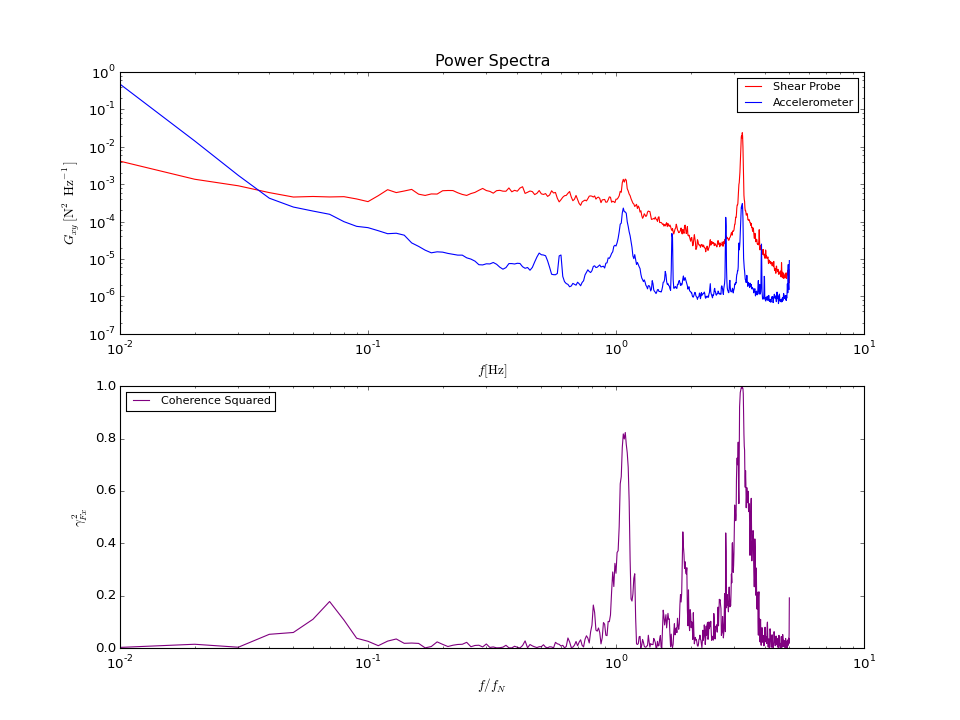

In [24]:
cxy,fxy=mlab.csd(shear,ac,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
py,fy=mlab.psd(ac,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
px,fx=mlab.psd(shear,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2);

#ac = py, shear = px

fig,ax=plt.subplots(2,1,figsize=(12,9))
ax[0].loglog(fx,px,'k',color='red', label='Shear Probe')
ax[0].loglog(fy,py,'k',color='blue', label='Accelerometer')
ax[0].set_xlabel(r'$f \mathrm{[Hz]}$')
ax[0].set_ylabel(r'$G_{xy}\ \mathrm{[N^2\ Hz^{-1}]}$');
ax[0].legend(loc='best',fontsize='small')
ax[0].set_title('Power Spectra')

ax[1].semilogx(fxy,abs(cxy)**2/px/py,'k',color='purple', label='Coherence Squared')
ax[1].set_ylabel('$\gamma^2_{Fx}$')
ax[1].set_xlabel('$f/f_N$')
ax[1].legend(loc='best',fontsize='small')

The two spectra share peaks at 1Hz, and 3Hz. The coherence plot agrees with these two being defined peaks. However, a third peak at around 2Hz is also seen in the coherence and this can be realted to the peak seen in the acceleraometer in the same place. It does not appear in the shear probe, and it is considered to be noise introduced from the accelerometer.

3 Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.

<IPython.core.display.Javascript object>


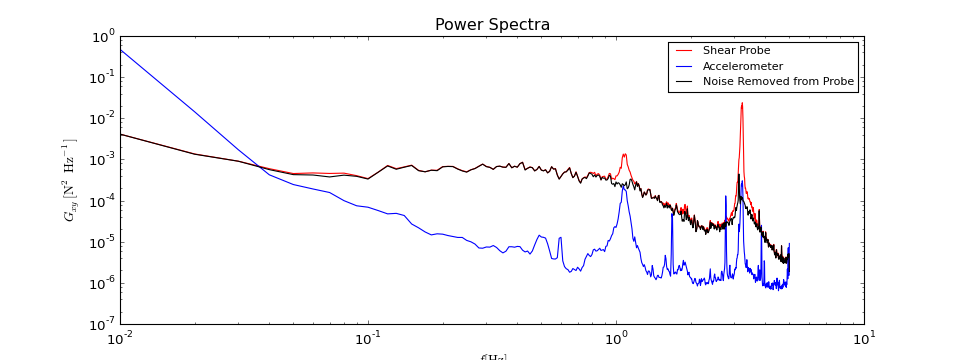

In [25]:
# Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.
#get rid of accelerometer, and create a theoretical spectra too
Gnn = px - abs(cxy)**2/py
fig=plt.figure(figsize=(12,4.5))
ax=plt.subplot()
ax.loglog(fx,px,'k',color='red', label='Shear Probe')
ax.loglog(fy,py,'k',color='blue', label='Accelerometer')
ax.loglog(fy,Gnn,'k',color='black', label='Noise Removed from Probe')
ax.set_xlabel(r'$f \mathrm{[Hz]}$')
ax.set_ylabel(r'$G_{xy}\ \mathrm{[N^2\ Hz^{-1}]}$');
ax.legend(loc='best',fontsize='small')
ax.set_title('Power Spectra')

The accelerometer was removed from the shear probe data and it appears to have fit quite well. The peak at 1Hz is gone, but the peak at 3Hz is still persistent. This lets me think that the natural freqeuncy of this system is around 3Hz, and it quite difficult to remove.

4 Chose two separate periods of the time series, one that is "turbulent" and one that is "quiet", and plot the raw and corrected shear spectra. Comment on the differences and the effect of the correction on each spectral estimate.

<IPython.core.display.Javascript object>


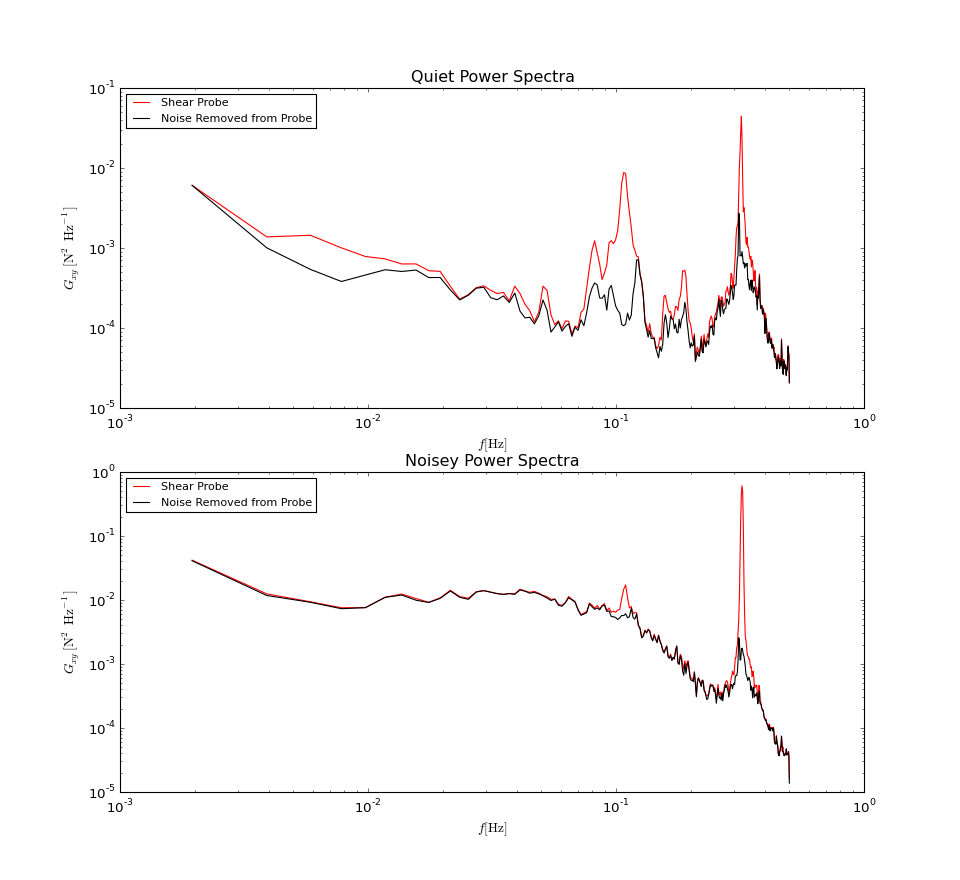

257 257
257 257


In [28]:
#Quiet: 80-110 
#Noisey: 120-170
def retrieve(shear,ac,length,dt,name,num):
    cxy,fxy=mlab.csd(shear,ac,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
    py,fy=mlab.psd(ac,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
    px,fx=mlab.psd(shear,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2);
    Gnn = px - abs(cxy)**2/py
    print px.size, fx.size
    ax[num].loglog(fx,px,'k',color='red', label='Shear Probe')
    ax[num].loglog(fy,Gnn,'k',color='black', label='Noise Removed from Probe')
    ax[num].set_xlabel(r'$f \mathrm{[Hz]}$')
    ax[num].set_ylabel(r'$G_{xy}\ \mathrm{[N^2\ Hz^{-1}]}$');
    ax[num].legend(loc='best',fontsize='small')
    ax[num].set_title(name+' Power Spectra')    
    
a=50
b=110
c = 190
d = 280
ta= int(a/(time[1]-time[0])) -1
tb= int(b/(time[1]-time[0])) -1
tc= int(c/(time[1]-time[0])) -1
td= int(d/(time[1]-time[0])) -1
qshear = shear[ta:tb]
qac = ac[ta:tb]
nshear = shear[tc:td]
nac =  ac[tc:td]

fig,ax=plt.subplots(2,1,figsize=(12,11))
retrieve(qshear,qac,512,1.,'Quiet',0)
retrieve(nshear,nac,512,1.,'Noisey',1)



The quiet power spectra appears to have little correction made to it while the noisey spectra has more of a correction. This makes sense since more noise is removed for the noisey section, thus agreeing more with the shear probe data, while the quiet section has less to correct so it is allowed some deviation from the shear probe data.